In [2]:
#Importing the required packages and functions.
from psaw import PushshiftAPI
import datetime as dt
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
%matplotlib inline
api=PushshiftAPI()

In [3]:
#Defining a function that uses psaw to get all of the comments after 'start' and before 'end' to a user specified subreddit. 
#All comments with negative scores or scores of zero are set to 1. (This allows us to make the log-log plots!)
def comments(sub,start,end):
    raw_data = list(api.search_comments(after=start, before= end, 
                                      subreddit=sub,
                                      filter='score'))
    filtered_data = [x[1] for x in raw_data]
    filtered_data = [1 if i <= 0 else i for i in filtered_data]
    return filtered_data

In [4]:
#Defining a function to produce side-by-side histograms on normal and log-log axes.
def hist_comp(data,n_bins,sub):
    plt.figure(figsize=(15,7.5))
    plt.subplot(1, 2, 1)
    hist, bins, _ = plt.hist(data,bins=n_bins)
    plt.title("Popularity of reddit comments to r/%s" %sub)
    plt.ylabel("Number of comments")
    plt.xlabel("Score")
    plt.subplot(1, 2, 2)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(data,bins=logbins)
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Popularity of reddit comments to r/%s on a log-log scale" %sub)
    plt.ylabel("Number of comments")
    plt.xlabel("Score")
    plt.show();

In [7]:
#Setting the start and end dates that the comments will be taken from.
start_epoch=int(dt.datetime(2018,1,1).timestamp())
end_epoch=int(dt.datetime(2018,1,5).timestamp())

In [33]:
#Getting comments from r/todayilearned
TIL_com = comments('todayilearned',start_epoch,end_epoch)
np.savetxt("TIL_com.csv", TIL_com, delimiter=",", fmt='%s', header='TIL_com')

In [8]:
#Getting comments from r/AskReddit
AR_com = comments('AskReddit',start_epoch,end_epoch)
np.savetxt("AR_com.csv", AR_com, delimiter=",", fmt='%s', header='AR_com')

In [4]:
#Getting comments from r/gaming
gaming_com = comments('gaming',start_epoch,end_epoch)
np.savetxt("gaming_com.csv", gaming_com, delimiter=",", fmt='%s', header='gaming_com')

In [5]:
#Getting comments from r/science
science_com = comments('science',start_epoch,end_epoch)
np.savetxt("science_com.csv", science_com, delimiter=",", fmt='%s', header='science_com')

In [9]:
#Reading all of the csv files we created back as variables. This was I can transport the code to different computers 
#without having actually grab all of the comments again - it actually takes quite a long time to get the data.
TIL_com = np.genfromtxt('TIL_com.csv', delimiter=',')
AR_com = np.genfromtxt('AR_com.csv', delimiter=',')
gaming_com = np.genfromtxt('gaming_com.csv', delimiter=',')
science_com = np.genfromtxt('science_com.csv', delimiter=',')

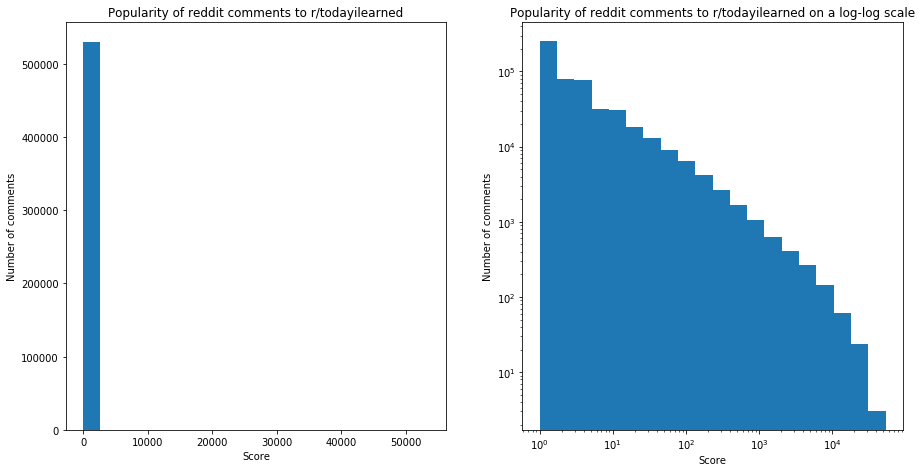

In [10]:
hist_comp(TIL_com,20,'todayilearned')

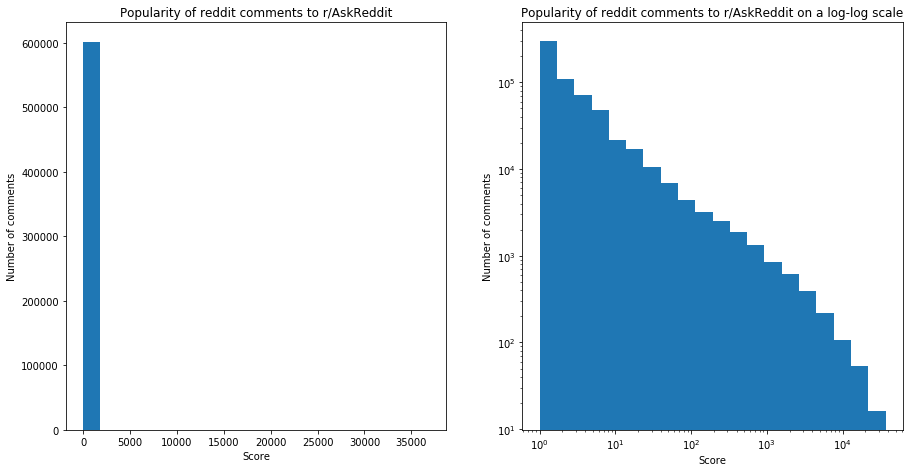

In [11]:
hist_comp(AR_com,20,'AskReddit')

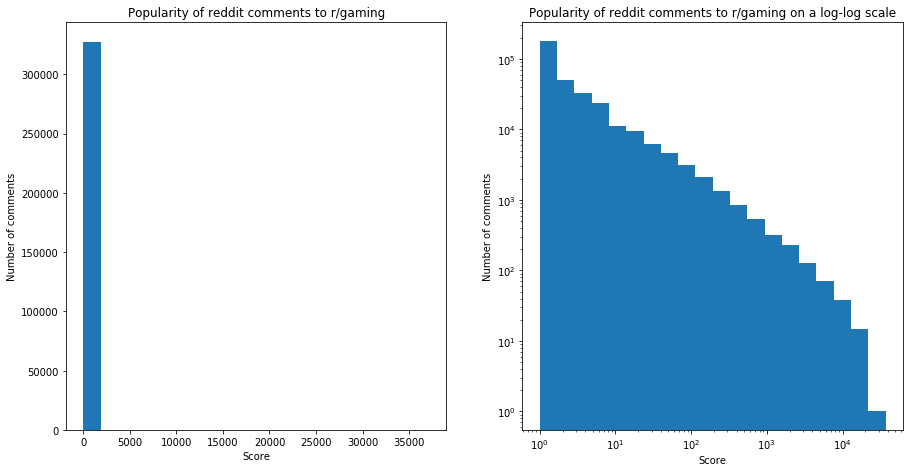

In [12]:
hist_comp(gaming_com,20,'gaming')

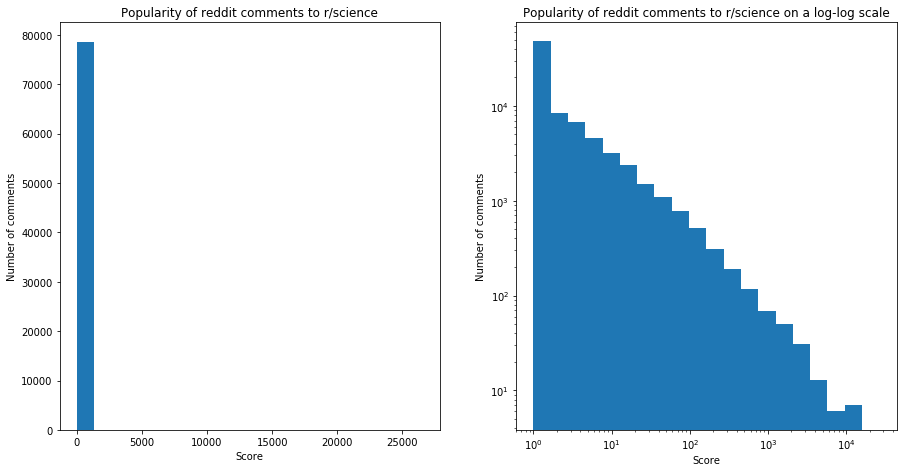

In [13]:
hist_comp(science_com,20,'science')

In [14]:
#We can use the powerlaw package to fit a powerlaw to our data. It will automatically find the optimal x_min value to start the
#fit at, however in practise this tends to be conservative. We can manually override this to fit a powerlaw over a greater
#number of decades.
TIL_pl = powerlaw.Fit(TIL_com,xmin=10)
AR_pl = powerlaw.Fit(AR_com, xmin=10)
gaming_pl = powerlaw.Fit(gaming_com,xmin=10)
science_pl = powerlaw.Fit(science_com,xmin=10)

C:\Users\jcdav\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [15]:
#We can also use the powerlaw package to test the fit of the powerlaw distribution against other possible  distributions using
#KS? statistics. The first value which is returned is the test statistic. A positive test statistic means that the first 
#distribution is preferred and vice versa. The second value which is returned is the assosciated p-value.
R1,p1 = TIL_pl.distribution_compare('power_law','truncated_power_law')
print(R1,p1)
R2,p2 = TIL_pl.distribution_compare('power_law','exponential')
print(R2,p2)
R3,p3 = TIL_pl.distribution_compare('power_law','stretched_exponential')
print(R3,p3)
R4,p4 = TIL_pl.distribution_compare('power_law','lognormal')
print(R4,p4)

Assuming nested distributions
C:\Users\jcdav\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\jcdav\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


-232.9147075523566 0.0


C:\Users\jcdav\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


85909.62610733074 0.0
74.07376730689795 0.02167239937196296
-108.96591558778576 6.935746631215455e-19


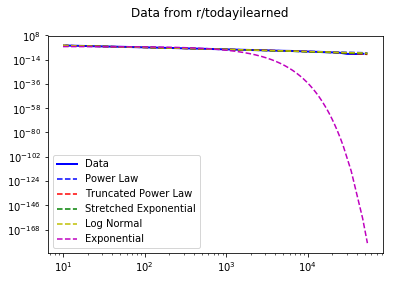

In [22]:
#We can also plot the fitted distributions against our data. Clearly the exponential does not fit our data well at all! 

fig1 = TIL_pl.plot_pdf(color='b', linewidth=2)
plt.suptitle('Data from r/todayilearned')
TIL_pl.power_law.plot_pdf(color='b', linestyle='--',ax=fig1)
TIL_pl.truncated_power_law.plot_pdf(color='r', linestyle='--',ax=fig1)
TIL_pl.stretched_exponential.plot_pdf(color='g', linestyle='--',ax=fig1)
TIL_pl.lognormal.plot_pdf(color='y', linestyle='--',ax=fig1)
TIL_pl.exponential.plot_pdf(color='m', linestyle='--',ax=fig1)
fig1.legend(['Data','Power Law','Truncated Power Law','Stretched Exponential','Log Normal','Exponential'])


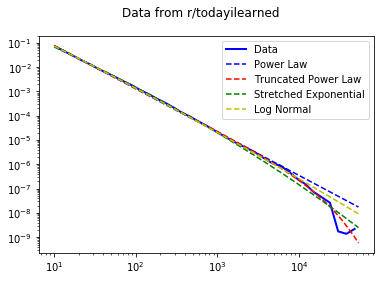

In [17]:
#This produces a similar plot to the above but with the exponential distribution removed.
fig2 = TIL_pl.plot_pdf(color='b', linewidth=2)
plt.suptitle('Data from r/todayilearned')
TIL_pl.power_law.plot_pdf(color='b', linestyle='--',ax=fig2)
TIL_pl.truncated_power_law.plot_pdf(color='r', linestyle='--',ax=fig2)
TIL_pl.stretched_exponential.plot_pdf(color='g', linestyle='--',ax=fig2)
TIL_pl.lognormal.plot_pdf(color='y', linestyle='--',ax=fig2)
fig2.legend(['Data','Power Law','Truncated Power Law','Stretched Exponential','Log Normal'])

C:\Users\jcdav\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


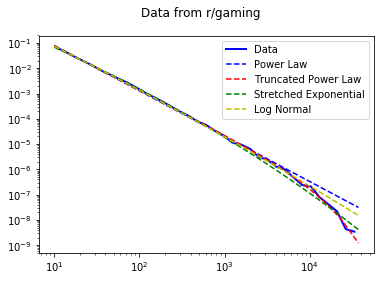

In [18]:
#Producing similar plots for the r/gaming data.
fig3 = gaming_pl.plot_pdf(color='b', linewidth=2)
plt.suptitle('Data from r/gaming')
gaming_pl.power_law.plot_pdf(color='b', linestyle='--',ax=fig3)
gaming_pl.truncated_power_law.plot_pdf(color='r', linestyle='--',ax=fig3)
gaming_pl.stretched_exponential.plot_pdf(color='g', linestyle='--',ax=fig3)
gaming_pl.lognormal.plot_pdf(color='y', linestyle='--',ax=fig3)
fig3.legend(['Data','Power Law','Truncated Power Law','Stretched Exponential','Log Normal'])

C:\Users\jcdav\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


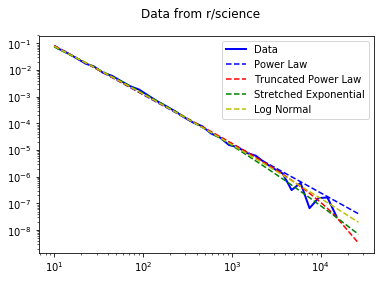

In [19]:
#Producing similar plots for the r/science data. Note the strange deviations in the tail!
fig4 = science_pl.plot_pdf(color='b', linewidth=2)
plt.suptitle('Data from r/science')
science_pl.power_law.plot_pdf(color='b', linestyle='--',ax=fig4)
science_pl.truncated_power_law.plot_pdf(color='r', linestyle='--',ax=fig4)
science_pl.stretched_exponential.plot_pdf(color='g', linestyle='--',ax=fig4)
science_pl.lognormal.plot_pdf(color='y', linestyle='--',ax=fig4)
fig4.legend(['Data','Power Law','Truncated Power Law','Stretched Exponential','Log Normal'])

C:\Users\jcdav\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


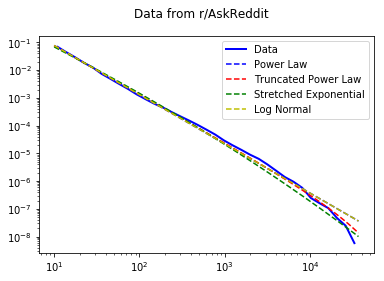

In [20]:
#And finally producing a plot for the r/AskReddit data. 
fig5 = AR_pl.plot_pdf(color='b', linewidth=2)
plt.suptitle('Data from r/AskReddit')
AR_pl.power_law.plot_pdf(color='b', linestyle='--',ax=fig5)
AR_pl.truncated_power_law.plot_pdf(color='r', linestyle='--',ax=fig5)
AR_pl.stretched_exponential.plot_pdf(color='g', linestyle='--',ax=fig5)
AR_pl.lognormal.plot_pdf(color='y', linestyle='--',ax=fig5)
fig5.legend(['Data','Power Law','Truncated Power Law','Stretched Exponential','Log Normal'])

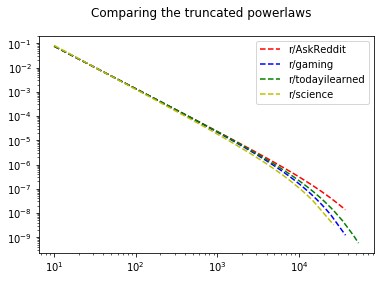

In [21]:
#For each of the 4 subreddits that we examined, the Truncated power law is the best of the 5 models which have been fitted.
#We can plot all of the truncated power laws on the same axis to see how they compare.
fig6 = AR_pl.truncated_power_law.plot_pdf(color='r', linestyle='--')
plt.suptitle('Comparing the truncated powerlaws')
gaming_pl.truncated_power_law.plot_pdf(color='b', linestyle='--',ax=fig6)
TIL_pl.truncated_power_law.plot_pdf(color='g', linestyle='--',ax=fig6)
science_pl.truncated_power_law.plot_pdf(color='y', linestyle='--',ax=fig6)
fig6.legend(['r/AskReddit','r/gaming','r/todayilearned','r/science'])

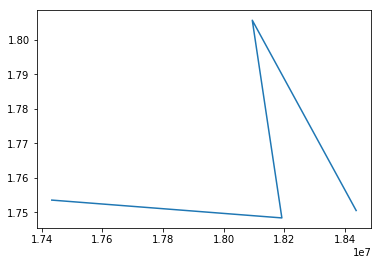

In [39]:
#We can also plot the coefficients of each truncated powerlaw against the size of the subreddit at the time which
#the data was from. It's not that good though.
sizes = [18437887,18094944,18192616,17433023]
coeffs = [AR_pl.truncated_power_law.alpha,science_pl.truncated_power_law.alpha,TIL_pl.truncated_power_law.alpha,gaming_pl.truncated_power_law.alpha]
plt.plot(sizes,coeffs)